In [14]:
import numpy as np
import matplotlib.pyplot as plt

## How to sample $N$ sorted uniforms

### Naive method

In [1]:
N = 10

In [9]:
U = [np.random.uniform() for _ in range(N)]
print(sorted(U))

[0.10589631905599228, 0.15700824143276249, 0.28329430734063354, 0.4343415069948978, 0.45755754768533363, 0.4741318586325023, 0.4827775910519757, 0.5784968697342188, 0.84309672339804, 0.990893384254053]


### Smart method

In [8]:
E = [np.random.exponential(1) for _ in range(10)]
V = np.cumsum(E)
print(V[:-1]/V[-1])

[0.15895362 0.19550675 0.28412259 0.44423502 0.57805713 0.60550587
 0.64605758 0.68504546 0.78860487]


### Inverse CDF Algorithm

In [10]:
def inversecdf(su,W):
    """ Input:  su[0:N] sorted uniforms
                W[0:K]  normalised weights (sum to one)
        Output: A[0:N]  indexes (in {0,...,K-1})
        """
    j=0; s=W[0]; N = su.shape[0]
    A = np.zeros(N,dtype='int64')
    for n in range(N):
        while su[n]>s:
            j += 1
            s += W[j]
        A[n] = j
    return A

Discrete distribution :

In [23]:
w = [0, 0.1, 0.2, 0.3, 0.4]
W = np.cumsum(w)

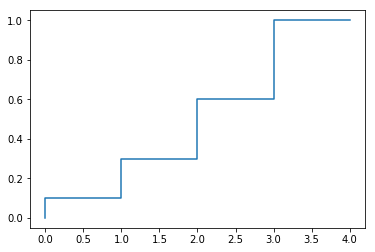

In [24]:
plt.step(np.arange(len(W)),W)

In [103]:
E = [np.random.exponential(1) for _ in range(len(W)+1)]
V = np.cumsum(E)
su=V[:-1]/V[-1]

inversecdf(su,w)

array([2, 3, 3, 4, 4])